In [119]:
import os
import time
#mysys="jupyter" #
mysys="colab"
split="_90_5_5b_"
sn='sn_'
test_ratio=0.05

training_samples=18000
testing_samples=1000
validation_samples=1000

if mysys=="colab":
    from google.colab import drive
    drive.mount('/content/drive')
    in_path='/content/drive/MyDrive/UNSW_Data/'
    datapath='/content/drive/MyDrive/ANN_Edge/unsw_data/final4/'
    modelpath='/content/drive/MyDrive/ANN_Edge/unsw_data/final4/models/'
    slash="/"
    ML_path=datapath+'ml2/'
    STDN_path=ML_path+ '/ml/stdn/'
else:
    current_folder = os.getcwd() + kkk
    print(current_folder)
    slash="\\"
    path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\\'
    print(path)
    ML_path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\ml\\'
    STDN_path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\ml\stdn\\'

print(in_path)
print(datapath)

in_f_train= in_path + 'UNSW_NB15_training-set.csv'
in_f_test=in_path+'UNSW_NB15_testing-set.csv'
f_features=in_path+ 'UNSW_NB15_f.csv'
out_f_train=datapath+'unsw-nb15_training' + split +'.csv'
out_f_test=datapath+'unsw-nb15_testing' + split+ '.csv'
out_f_validation=datapath+'unsw-nb15_validation' + split+ '.csv'


in_f_features=in_path + 'UNSW_NB15_f.csv'
print(in_f_train)
print(in_f_test)
print(in_f_features)
print(out_f_train)
print(out_f_test)
print(out_f_validation)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/UNSW_Data/
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_training-set.csv
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_testing-set.csv
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_f.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_training_90_5_5b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_testing_90_5_5b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_validation_90_5_5b_.csv


In [120]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split

## Load UNSWNB-15 Data

In [121]:
df_train= pd.read_csv(in_f_train)
df_test=pd.read_csv(in_f_test)
df_features=pd.read_csv(in_f_features)
print(df_features.info())
print("--------------------------------------------")
print(df_train.info())
print("--------------------------------------------")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          49 non-null     int64 
 1   Name         49 non-null     object
 2   Type         49 non-null     object
 3   Description  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB
None
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  


In [122]:
print(df_train.shape, df_test.shape)
print(df_train.shape[0]/(df_train.shape[0]+df_test.shape[0]))
print(df_test.shape[0]/(df_train.shape[0]+df_test.shape[0]))

(175341, 45) (82332, 45)
0.6804787463180078
0.3195212536819923


In [123]:
# Count the number of samples in each class
class_counts_train =df_train['label'].value_counts()
print (class_counts_train)
cl0_c_tr=class_counts_train[0]/(class_counts_train[0]+class_counts_train[1])
cl1_c_tr=class_counts_train[1]/(class_counts_train[0]+class_counts_train[1])
print('Testing Ratio',  "{:.2f}".format(cl0_c_tr),  "{:.2f}".format(cl1_c_tr))

label
1    119341
0     56000
Name: count, dtype: int64
Testing Ratio 0.32 0.68


In [124]:
# Count the number of samples in each class
class_counts_test = df_test['label'].value_counts()
print (class_counts_test )
cl0_c_ts=class_counts_test[0]/(class_counts_test[0]+class_counts_test[1])
cl1_c_ts=class_counts_test[1]/(class_counts_test[0]+class_counts_test[1])
print('Testing Ratio',  "{:.2f}".format(cl0_c_ts),  "{:.2f}".format(cl1_c_ts))

label
1    45332
0    37000
Name: count, dtype: int64
Testing Ratio 0.45 0.55


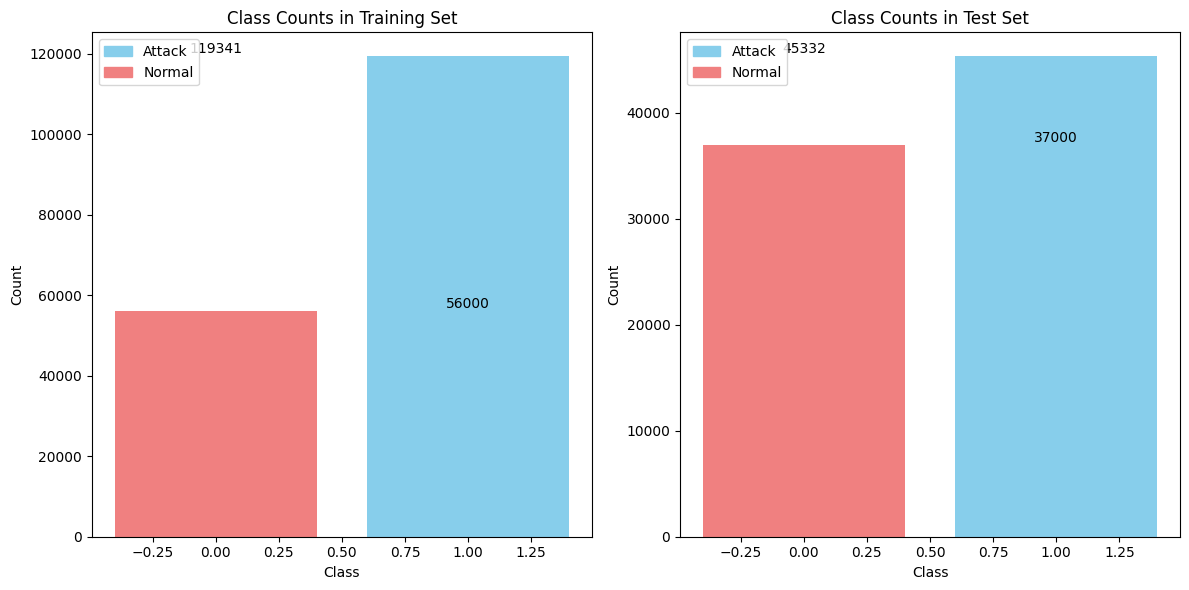

In [125]:

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot class counts for training set
axes[0].bar(class_counts_train.index, class_counts_train.values, color=['skyblue', 'lightcoral'])
axes[0].set_title('Class Counts in Training Set')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Annotate bars with class counts
for i, count in enumerate(class_counts_train.values):
    axes[0].text(i, count, str(count), ha='center', va='bottom')

# Plot class counts for test set
axes[1].bar(class_counts_test.index, class_counts_test.values, color=['skyblue', 'lightcoral'])
axes[1].set_title('Class Counts in Test Set')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

# Annotate bars with class counts
for i, count in enumerate(class_counts_test.values):
    axes[1].text(i, count, str(count), ha='center', va='bottom')
# Create custom legends
legend_train = [mpatches.Patch(color='skyblue', label='Attack'), mpatches.Patch(color='lightcoral', label='Normal')]
legend_test = [mpatches.Patch(color='skyblue', label='Attack'), mpatches.Patch(color='lightcoral', label='Normal')]

# Add legend
axes[0].legend(handles=legend_train)
axes[1].legend(handles=legend_test)
# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [126]:
df = pd.concat([df_train, df_test])
df.shape

(257673, 45)

In [127]:
class_counts= df['label'].value_counts()
print (class_counts)
cl0_c=class_counts[0]/(class_counts[0]+class_counts[1])
cl1_c=class_counts[1]/(class_counts[0]+class_counts[1])
print('Training Ratio',  "{:.2f}".format(cl0_c),  "{:.2f}".format(cl1_c))

label
1    164673
0     93000
Name: count, dtype: int64
Training Ratio 0.36 0.64


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sinpkt  

In [129]:
len(df)

257673

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df
# Separate samples based on class labels
class_0_samples = df[df['label'] == 0]
class_1_samples = df[df['label'] == 1]

total_samples = 186000
training_ratio = 0.90
validation_ratio = 0.05
testing_ratio = 0.05

training_samples = int(total_samples * training_ratio)
validation_samples = int(total_samples * validation_ratio)
testing_samples = int(total_samples * testing_ratio)

# Sample an equal number of samples from each class
n_samples_per_class = int(total_samples / 2)  # 10,000 samples per class for balance

balanced_class_0 = class_0_samples.sample(n=n_samples_per_class, replace=True)
balanced_class_1 = class_1_samples.sample(n=n_samples_per_class, replace=True)

# Combine the balanced samples
balanced_df = pd.concat([balanced_class_0, balanced_class_1])

# Split the balanced dataset into training, validation, and testing sets
train_df, temp_df = train_test_split(balanced_df, test_size=validation_samples + testing_samples, stratify=balanced_df['label'])
validation_df, test_df = train_test_split(temp_df, test_size=testing_samples / (validation_samples + testing_samples), stratify=temp_df['label'])

# Display the shapes of the resulting datasets
print("Training set shape:", train_df.shape)
print("Validation set shape:", validation_df.shape)
print("Testing set shape:", test_df.shape)
print("Training set ratio:", train_df.shape[0] / total_samples)
print("Validation set ratio:", validation_df.shape[0] / total_samples)
print("Testing set ratio:", test_df.shape[0] / total_samples)


Training set shape: (167400, 45)
Validation set shape: (9300, 45)
Testing set shape: (9300, 45)
Training set ratio: 0.9
Validation set ratio: 0.05
Testing set ratio: 0.05


In [131]:
print("Training set shape:", balanced_df.shape)

Training set shape: (186000, 45)


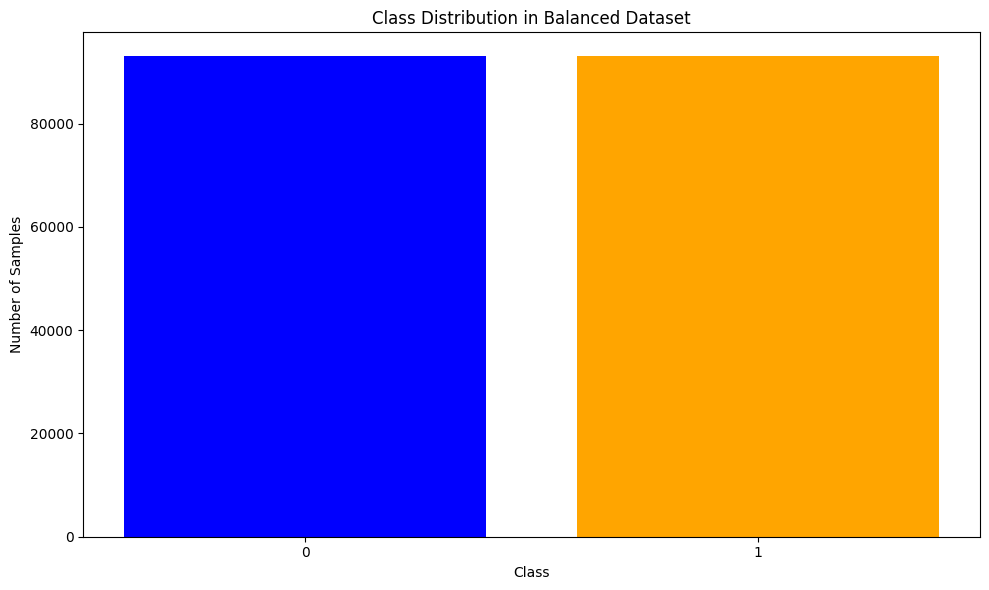

In [132]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'balanced_df' is your DataFrame containing the balanced dataset

# Calculate class counts for each label
class_counts = balanced_df['label'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar plot for class counts
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])

# Set plot title and labels
plt.title('Class Distribution in Balanced Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(class_counts.index)  # Set x-ticks to match the class labels

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()



Shuffle the training data before feeding it into the model during training.
Shuffling helps prevent the model from learning any patterns based on the order of the data and ensures that the model generalizes well.

In [133]:
balanced_df_shuffled = balanced_df.sample(frac=1, random_state=42)  # random_state for reproducibility

# Filter and keep only numeric columns
numeric_columns = balanced_df_shuffled.select_dtypes(include=['number']).columns
df_numeric = balanced_df_shuffled[numeric_columns]
print(df_numeric.columns)
df=df_numeric

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')


In [134]:
df

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
39422,39423,0.045280,72,74,4222,64070,3202.296938,31,29,7.356891e+05,...,1,1,5,0,0,0,3,11,0,0
77668,77669,0.936371,32,12,27068,642,45.921968,254,252,2.240394e+05,...,1,1,5,0,0,0,1,5,0,0
18823,18824,0.020207,8,10,1040,824,841.292584,31,29,3.602712e+05,...,1,1,2,0,0,1,4,1,0,0
9075,9076,1.734803,10,10,450,3754,10.952252,62,252,1.867647e+03,...,1,1,2,0,0,0,2,1,0,1
81362,81363,0.829327,10,6,534,268,18.086955,254,252,4.639907e+03,...,1,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118921,118922,0.000003,2,0,114,0,333333.321500,254,0,1.520000e+08,...,26,13,37,0,0,0,26,37,0,1
131099,131100,0.000007,2,0,114,0,142857.140900,254,0,6.514286e+07,...,15,15,25,0,0,0,15,25,0,1
56288,56289,0.000007,2,0,200,0,90909.090200,254,0,7.272727e+07,...,5,5,5,0,0,0,5,13,0,1
160001,160002,0.000005,2,0,114,0,200000.005100,254,0,9.120000e+07,...,14,14,31,0,0,0,15,31,0,1


In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Replace 'target_variable' with the name of your target variable
# Define the correlation threshold for feature selection


# Compute correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix.to_string())



                         id       dur     spkts     dpkts    sbytes    dbytes      rate      sttl      dttl     sload     dload     sloss     dloss    sinpkt    dinpkt      sjit      djit      swin     stcpb     dtcpb      dwin    tcprtt    synack    ackdat     smean     dmean  trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports     label
id                 1.000000  0.026259 -0.058081 -0.112383  0.004751 -0.073167  0.295166  0.500487  0.045012  0.130876 -0.282214 -0.012778 -0.090603  0.069859 -0.009927  0.002453 -0.058033 -0.295435 -0.228113 -0.224831 -0.294581  0.067267  0.057650  0.068653 -0.035208 -0.299793    -0.013962          -0.019892    0.287719      0.473684    0.283830          0.351597          0.403955        0.364445     -0.028724   -0.028886         -0.007067    0.255230    0.289729         0.076047  0.533010
dur       

In [136]:
threshold = 0.5

# Select features highly correlated with the target variable
target_correlation = correlation_matrix['label'].abs().sort_values(ascending=False)
selected_features = target_correlation[target_correlation > threshold].index.tolist()

# Display the selected features and their correlation values
selected_correlation = target_correlation[target_correlation > threshold]
selected_correlation_df = pd.DataFrame(selected_correlation, columns=['Correlation'])
print("Selected Features Highly Correlated with Target Variable:")
print(selected_correlation_df)


Selected Features Highly Correlated with Target Variable:
Empty DataFrame
Columns: [Correlation]
Index: []


In [137]:
selected_correlation

label    1.00000
sttl     0.61583
id       0.53301
Name: label, dtype: float64

In [101]:
selected_features

['label', 'sttl', 'id']

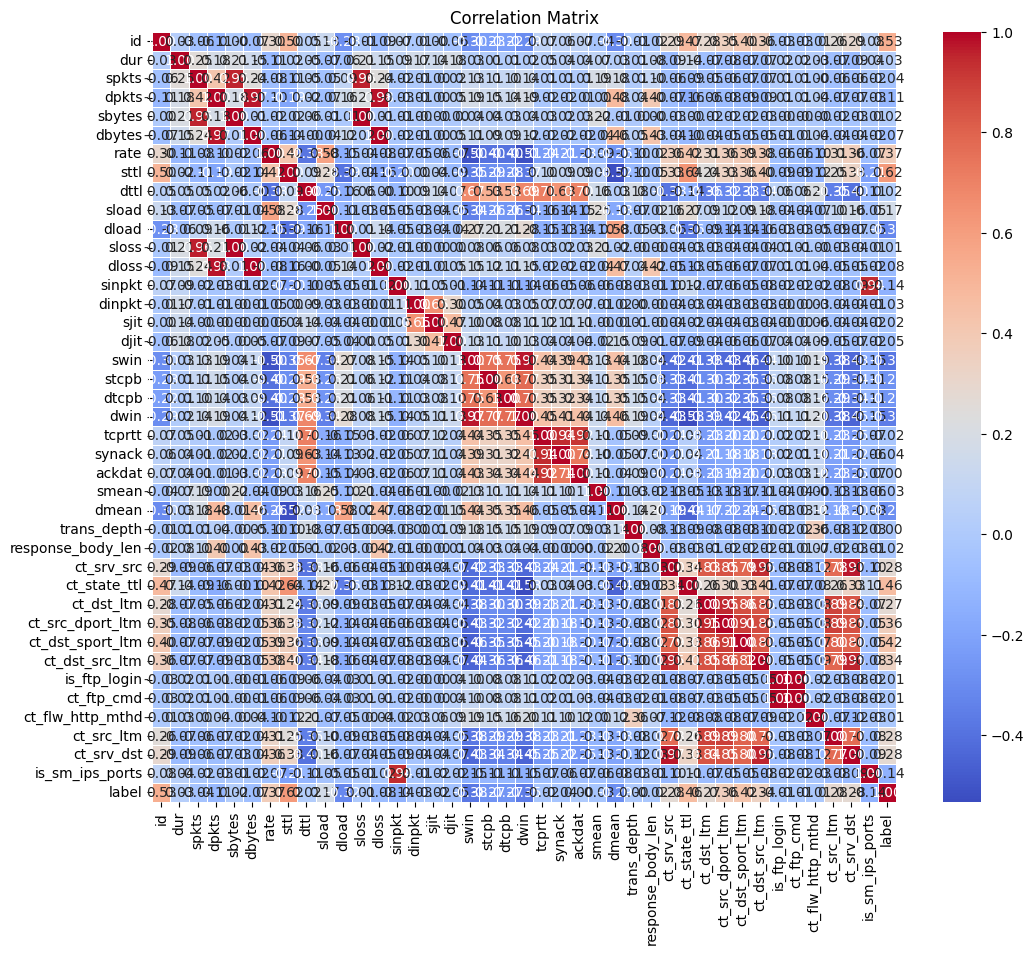

In [139]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [140]:
target_correlation

label                1.000000
sttl                 0.615830
id                   0.533010
ct_state_ttl         0.462584
ct_dst_sport_ltm     0.419580
swin                 0.380377
rate                 0.372454
ct_src_dport_ltm     0.362391
dwin                 0.353424
ct_dst_src_ltm       0.335805
dload                0.316599
dmean                0.289429
ct_src_ltm           0.283195
ct_srv_dst           0.277186
ct_srv_src           0.275404
stcpb                0.273460
ct_dst_ltm           0.272344
dtcpb                0.267697
sload                0.171421
is_sm_ips_ports      0.141361
sinpkt               0.137691
dpkts                0.106036
dloss                0.084076
dbytes               0.066623
djit                 0.048407
spkts                0.043764
synack               0.041112
dur                  0.032068
smean                0.030790
dinpkt               0.028516
sbytes               0.024450
tcprtt               0.023630
dttl                 0.020999
response_b

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train = df.drop('label', axis=1)  # Features (all columns except 'label')
y_train = df['label']  # Target variable ('label')

# Step 3: Train a Random Forest model to obtain feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 4: Select top features based on feature importance scores
num_features = 10  # Specify the number of top features to select
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
selected_features = feature_importance[:num_features].index.tolist()

# Display the selected top features based on importance
print("Top {} Features Selected based on Importance:".format(num_features))
print(selected_features)



Top 10 Features Selected based on Importance:
['id', 'sttl', 'ct_state_ttl', 'sload', 'rate', 'smean', 'sbytes', 'dbytes', 'ct_dst_src_ltm', 'dload']


In [143]:
feature_importance[:]

id                   0.127605
sttl                 0.092174
ct_state_ttl         0.086139
sload                0.074580
rate                 0.051913
smean                0.048917
sbytes               0.042146
dbytes               0.040878
ct_dst_src_ltm       0.037561
dload                0.034682
ct_srv_dst           0.030173
dpkts                0.027521
dttl                 0.027448
ct_dst_sport_ltm     0.025284
ct_srv_src           0.024336
synack               0.023249
dmean                0.021751
dinpkt               0.021724
dur                  0.020309
tcprtt               0.020149
sinpkt               0.019044
ackdat               0.012275
swin                 0.012143
spkts                0.009447
sjit                 0.008559
djit                 0.008016
sloss                0.007990
ct_src_dport_ltm     0.006923
ct_dst_ltm           0.005992
stcpb                0.005980
ct_src_ltm           0.005219
dloss                0.005188
dtcpb                0.004852
response_b

In [145]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information scores
mi_scores = mutual_info_classif(X_train, y_train)

# Select features based on mutual information scores
selected_features = X_train.columns[mi_scores.argsort()[-num_features:]].tolist()
selected_features

['dinpkt',
 'sttl',
 'ct_state_ttl',
 'dbytes',
 'dur',
 'smean',
 'rate',
 'sload',
 'id',
 'sbytes']

In [151]:
X_train.columns[mi_scores.argsort()].tolist() #array in ascending order

['is_ftp_login',
 'trans_depth',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'is_sm_ips_ports',
 'response_body_len',
 'dwin',
 'ct_src_ltm',
 'swin',
 'ct_srv_src',
 'ct_dst_ltm',
 'ct_dst_src_ltm',
 'ct_srv_dst',
 'ct_src_dport_ltm',
 'sloss',
 'dtcpb',
 'dloss',
 'stcpb',
 'spkts',
 'ct_dst_sport_ltm',
 'djit',
 'sjit',
 'ackdat',
 'synack',
 'dpkts',
 'tcprtt',
 'sinpkt',
 'dmean',
 'dload',
 'dttl',
 'dinpkt',
 'sttl',
 'ct_state_ttl',
 'dbytes',
 'dur',
 'smean',
 'rate',
 'sload',
 'id',
 'sbytes']

In [154]:
from sklearn.decomposition import PCA
import pandas as pd

num_features = 10  # Specify the number of components (features) to retain
pca = PCA(n_components=num_features)

# Fit PCA on the training data
pca.fit(X_train)

# Transform data using PCA to obtain principal components
X_train_pca = pca.transform(X_train)

# Get the list of field names corresponding to the original features
# The components_ attribute of PCA contains the directions (components) in feature space
# Each row of components_ represents a principal component (new feature)
# Each column of components_ corresponds to an original feature
# We can use the column names of X_train to identify the original features
original_feature_names = X_train.columns.tolist()  # Assuming X_train is a DataFrame

# Create a DataFrame to visualize the PCA components and their importance (coefficients)
components_df = pd.DataFrame(pca.components_, columns=original_feature_names)

# Display the top components (features) contributing to each principal component
print("Top Features Contributing to Each Principal Component:")
for i, component in enumerate(components_df.index):
    top_features = components_df.iloc[i].sort_values(ascending=False).head(3).index.tolist()
    print(f"Principal Component {i + 1}: {', '.join(top_features)}")


Top Features Contributing to Each Principal Component:
Principal Component 1: stcpb, dtcpb, dload
Principal Component 2: stcpb, sload, sjit
Principal Component 3: sload, dtcpb, stcpb
Principal Component 4: dload, dbytes, sload
Principal Component 5: sbytes, dbytes, response_body_len
Principal Component 6: dbytes, response_body_len, djit
Principal Component 7: sjit, sinpkt, djit
Principal Component 8: sjit, id, djit
Principal Component 9: response_body_len, id, sbytes
Principal Component 10: rate, response_body_len, sjit


In [158]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize RFE with a classifier
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=30)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Select features based on RFE ranking
selected_features = X_train.columns[rfe.support_].tolist()
print(selected_features)

['id', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dwin', 'smean', 'dmean', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst']


In [160]:
import datetime

# Get the current date and time
current_time = datetime.datetime.now()

# Format the current date and time
formatted_datetime = current_time.strftime("%Y-%m-%d %H:%M:%S")

# Print the formatted date and time
print("Formatted current date and time:", formatted_datetime)

Formatted current date and time: 2024-04-13 17:50:57
